In [1]:
import pandas as pd
from datetime import datetime

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv")

a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.sold = dados.sold.map(a_trocar)

dados['model_age'] = datetime.today().year - dados.model_year

dados['km_per_year'] = dados.mileage_per_year * 1.6

dados = dados.drop(columns= ['Unnamed: 0', 'mileage_per_year','model_year'], axis = 1)

dados.head()

,price,sold,model_age,km_per_year
0,30941.02,1,23,34881.6
1,40557.96,1,25,12548.8
2,89627.50,0,17,11374.4
3,95276.14,0,8,42916.8
4,117384.68,1,9,12696.0


In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(dados[['km_per_year','model_age','price']],dados['sold'],test_size=0.25)


dummy = DummyClassifier()
dummy.fit(X_train, y_train)
previsoes = dummy.predict(X_test)

acuaracia = accuracy_score(y_test,previsoes)

print(acuaracia)



0.5824


In [3]:
x = dados[['km_per_year','model_age','price']]
y =  dados['sold']

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(dados[['km_per_year','model_age','price']], dados['sold'], test_size = 0.25,
                                                         stratify = dados['sold'])
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


In [6]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

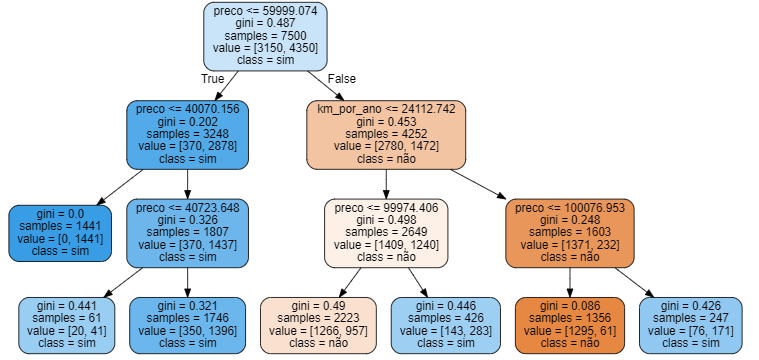

In [7]:
from IPython.display import Image
Image(filename='arvore.png')